### Packages

In [1]:
!pip install arch

In [2]:
!pip install pmdarima

# hay que instalar el autoarimas con el paquete pmdarima

In [3]:
!pip install yfinance

#s como vimos al prinicio yfinance para acceder a precios actuales

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import yfinance
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

### Loading the data

In [2]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "2015-01-07", end = "2022-03-20", 
                              interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  4 of 4 completed


In [14]:
df_comp = raw_data.copy()

In [15]:
df_comp.head()
# da apertura , alto, bajo y cierre

^FTSE                                                      \
                   Open         High          Low        Close       Volume   
Date                                                                          
2015-01-06  6417.200195  6452.700195  6328.600098  6366.500000  769463100.0   
2015-01-07  6366.500000  6459.700195  6366.500000  6419.799805  688211500.0   
2015-01-08  6419.799805  6580.799805  6419.799805  6570.000000  882740200.0   
2015-01-09  6570.000000  6570.200195  6471.399902  6501.100098  738488500.0   
2015-01-12  6501.100098  6542.399902  6447.899902  6501.399902  602313100.0   

                 ^GDAXI                                                      \
                   Open         High          Low        Close       Volume   
Date                                                                          
2015-01-06          NaN          NaN          NaN          NaN          NaN   
2015-01-07  9510.339844  9592.370117  9459.179688  9518.179688   82466600.0   
2015-01-08  9643.769531  9855.429688  9607.900391  9837.610352  114825000.0   
2015-01-09  9813.990234  9860.179688  9601.750000  9648.500000  107473400.0   
2015-01-12  9697.459961  9815.959961  9622.320312  9781.900391  101315800.0   

                   ^N225                                            \
                    Open          High           Low         Close   
Date                                                                 
2015-01-06           NaN           NaN           NaN           NaN   
2015-01-07  16808.259766  16974.609375  16808.259766  16885.330078   
2015-01-08  17067.400391  17243.710938  17016.089844  17167.099609   
2015-01-09  17318.740234  17342.650391  17129.529297  17197.730469   
2015-01-12           NaN           NaN           NaN           NaN   

                               ^GSPC                                         \
                 Volume         Open         High          Low        Close   
Date                                                                          
2015-01-06          NaN  2022.150024  2030.250000  1992.439941  2002.609985   
2015-01-07  138600000.0  2005.550049  2029.609985  2005.550049  2025.900024   
2015-01-08  140600000.0  2030.609985  2064.080078  2030.609985  2062.139893   
2015-01-09  155200000.0  2063.449951  2064.429932  2038.329956  2044.810059   
2015-01-12          NaN  2046.130005  2049.300049  2022.579956  2028.260010   

                          
                  Volume  
Date                      
2015-01-06  4.460110e+09  
2015-01-07  3.805480e+09  
2015-01-08  3.934010e+09  
2015-01-09  3.364140e+09  
2015-01-12  3.456460e+09

In [16]:
# nos quedamos con el preico de cierre

df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [17]:
df_comp.head()

^FTSE                                                      \
                   Open         High          Low        Close       Volume   
Date                                                                          
2015-01-06  6417.200195  6452.700195  6328.600098  6366.500000  769463100.0   
2015-01-07  6366.500000  6459.700195  6366.500000  6419.799805  688211500.0   
2015-01-08  6419.799805  6580.799805  6419.799805  6570.000000  882740200.0   
2015-01-09  6570.000000  6570.200195  6471.399902  6501.100098  738488500.0   
2015-01-12  6501.100098  6542.399902  6447.899902  6501.399902  602313100.0   

                 ^GDAXI                                                      \
                   Open         High          Low        Close       Volume   
Date                                                                          
2015-01-06          NaN          NaN          NaN          NaN          NaN   
2015-01-07  9510.339844  9592.370117  9459.179688  9518.179688   82466600.0   
2015-01-08  9643.769531  9855.429688  9607.900391  9837.610352  114825000.0   
2015-01-09  9813.990234  9860.179688  9601.750000  9648.500000  107473400.0   
2015-01-12  9697.459961  9815.959961  9622.320312  9781.900391  101315800.0   

            ...        ^N225        ^GSPC                            \
            ...       Volume         Open         High          Low   
Date        ...                                                       
2015-01-06  ...          NaN  2022.150024  2030.250000  1992.439941   
2015-01-07  ...  138600000.0  2005.550049  2029.609985  2005.550049   
2015-01-08  ...  140600000.0  2030.609985  2064.080078  2030.609985   
2015-01-09  ...  155200000.0  2063.449951  2064.429932  2038.329956   
2015-01-12  ...          NaN  2046.130005  2049.300049  2022.579956   

                                               spx          dax         ftse  \
                  Close        Volume                                          
Date                                                                           
2015-01-06  2002.609985  4.460110e+09  2002.609985          NaN  6366.500000   
2015-01-07  2025.900024  3.805480e+09  2025.900024  9518.179688  6419.799805   
2015-01-08  2062.139893  3.934010e+09  2062.139893  9837.610352  6570.000000   
2015-01-09  2044.810059  3.364140e+09  2044.810059  9648.500000  6501.100098   
2015-01-12  2028.260010  3.456460e+09  2028.260010  9781.900391  6501.399902   

                  nikkei  
                          
Date                      
2015-01-06           NaN  
2015-01-07  16885.330078  
2015-01-08  17167.099609  
2015-01-09  17197.730469  
2015-01-12           NaN  

[5 rows x 24 columns]

In [18]:
df_comp.tail()

^FTSE                                                       \
                   Open         High          Low        Close        Volume   
Date                                                                           
2022-03-14  7155.600098  7222.899902  7144.000000  7193.500000  9.160486e+08   
2022-03-15  7193.500000  7193.500000  7075.799805  7175.700195  8.705281e+08   
2022-03-16  7175.700195  7312.200195  7175.700195  7291.700195  1.914129e+09   
2022-03-17  7291.700195  7385.299805  7260.500000  7385.299805  1.095586e+09   
2022-03-18  7385.299805  7406.100098  7318.899902  7404.700195  2.316359e+09   

                  ^GDAXI                                            \
                    Open          High           Low         Close   
Date                                                                 
2022-03-14  13827.219727  14082.059570  13815.799805  13929.110352   
2022-03-15  13768.440430  13974.839844  13577.809570  13917.269531   
2022-03-16  14245.769531  14553.099609  14183.259766  14440.740234   
2022-03-17  14500.049805  14509.230469  14243.940430  14388.059570   
2022-03-18  14374.410156  14413.089844  14109.790039  14413.089844   

                         ...        ^N225        ^GSPC               \
                 Volume  ...       Volume         Open         High   
Date                     ...                                          
2022-03-14  118949300.0  ...   72600000.0  4202.750000  4247.569824   
2022-03-15  101279000.0  ...   73200000.0  4188.819824  4271.049805   
2022-03-16  138610100.0  ...   82300000.0  4288.140137  4358.899902   
2022-03-17   96870400.0  ...   89600000.0  4345.109863  4412.669922   
2022-03-18  181197700.0  ...  108200000.0  4407.339844  4465.399902   

                                                            spx           dax  \
                    Low        Close        Volume                              
Date                                                                            
2022-03-14  4161.720215  4173.109863  4.757600e+09  4173.109863  13929.110352   
2022-03-15  4187.899902  4262.450195  4.331170e+09  4262.450195  13917.269531   
2022-03-16  4251.990234  4357.859863  5.002240e+09  4357.859863  14440.740234   
2022-03-17  4335.649902  4411.669922  4.174170e+09  4411.669922  14388.059570   
2022-03-18  4390.569824  4463.120117  6.681510e+09  4463.120117  14413.089844   

                   ftse        nikkei  
                                       
Date                                   
2022-03-14  7193.500000  25307.849609  
2022-03-15  7175.700195  25346.480469  
2022-03-16  7291.700195  25762.009766  
2022-03-17  7385.299805  26652.890625  
2022-03-18  7404.700195  26827.429688  

[5 rows x 24 columns]

In [19]:
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [20]:
df_comp.head()

,spx,dax,ftse,nikkei
,,,,
Date,,,,
2015-01-06,2002.609985,NaN,6366.500000,NaN
2015-01-07,2025.900024,9518.179688,6419.799805,16885.330078
2015-01-08,2062.139893,9837.610352,6570.000000,17167.099609
2015-01-09,2044.810059,9648.500000,6501.100098,17197.730469
2015-01-12,2028.260010,9781.900391,6501.399902,17197.730469


### Creating Returns

In [21]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1)*100
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1)*100
df_comp['ret_dax'] = df_comp.dax.pct_change(1)*100
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1)*100

### Splitting the Data

In [22]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### Fitting a Model

In [23]:
from pmdarima.arima import auto_arima

In [25]:
model_auto = auto_arima(df.ret_ftse[1:], trace=True) # parametros predeterminados que notienen porque se optimos ni razonables

# autoarima de retornos - no debe terner integracion - solo a partir de la segunda fila

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4481.042, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4473.287, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4475.043, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4475.043, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4471.290, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4477.044, Time=0.71 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.675 seconds


In [26]:
model_auto = auto_arima(df.ftse, trace=True) # parametros predeterminados que notienen porque se optimos ni razonables


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16939.688, Time=8.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16954.038, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16955.949, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16955.952, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16952.060, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16947.353, Time=2.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16959.929, Time=0.98 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16937.868, Time=14.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16946.858, Time=4.69 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16936.135, Time=14.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16945.747, Time=9.53 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=16949.689, Time=9.60 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=16946.342, Time=13.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16944.693, Time=15.51 sec
 ARIMA(5,1,1)(0

In [27]:
model_auto

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [28]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1503
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -8460.028
Date:                Wed, 18 May 2022   AIC                          16934.057
Time:                        20:32:01   BIC                          16971.259
Sample:                             0   HQIC                         16947.915
                               - 1503                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5557      0.073    -21.301      0.000      -1.699      -1.413
ar.L2         -0.7346      0.073    -10.025      0.000      -0.878      -0.591
ar.L3         -0.0159      0.033     -0.483      0.629      -0.081       0.049
ar.L4         -0.0578      0.020     -2.903      0.004      -0.097      -0.019
ma.L1          1.5809      0.071     22.266      0.000       1.442       1.720
ma.L2          0.7581      0.065     11.696      0.000       0.631       0.885
sigma2      4569.6492     83.566     54.683      0.000    4405.862    4733.436
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5059.82
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Important Arguments

In [19]:
model_auto2 = auto_arima(df_comp.ret_ftse[1:], trace=True, 
                         m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1,  information_criterion = 'aic')


# exogenous -> outside factors (e.g other time series)
# m -> seasonal cycle length
# max_order -> maximum amount of variables to be used in the regression (p + q)
# max_p -> maximum AR components
# max_q -> maximum MA components
# max_d -> maximum Integrations
# maxiter -> maximum iterations we're giving the model to converge the coefficients (becomes harder as the order increases)
# alpha -> level of significance, default is 5%, which we should be using most of the time
# n_jobs -> how many models to fit at a time (-1 indicates "as many as possible")
# trend -> "ct" usually
# information_criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob' 
#        (Akaike Information Criterion, Corrected Akaike Information Criterion,
#        Bayesian Information Criterion, Hannan-Quinn Information Criterion, or
#        "out of bag"--for validation scoring--respectively)
# out_of_smaple_size -> validates the model selection (pass the entire dataset, and set 20% to be the out_of_sample_size)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=5516.631, Time=8.85 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=5519.882, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=5521.797, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=5521.799, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=5518.196, Time=0.06 sec
 ARIMA(2,0,2)(0,0,1)[5] intercept   : AIC=5517.373, Time=11.78 sec
 ARIMA(2,0,2)(1,0,0)[5] intercept   : AIC=5517.439, Time=8.59 sec
 ARIMA(2,0,2)(2,0,1)[5] intercept   : AIC=5518.773, Time=19.37 sec
 ARIMA(2,0,2)(1,0,2)[5] intercept   : AIC=5520.574, Time=18.69 sec
 ARIMA(2,0,2)(0,0,0)[5] intercept   : AIC=5516.196, Time=7.88 sec
 ARIMA(1,0,2)(0,0,0)[5] intercept   : AIC=5514.798, Time=3.36 sec
 ARIMA(1,0,2)(1,0,0)[5] intercept   : AIC=5516.725, Time=5.90 sec
 ARIMA(1,0,2)(0,0,1)[5] intercept   : AIC=5516.727, Time=6.27 sec
 ARIMA(1,0,2)(1,0,1)[5] intercept   : AIC=inf, Time=11.25 sec
 ARIMA(0,0,2)(0,0,0)[5] intercept 

In [58]:
model_auto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1878
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -2755.680
Date:                Thu, 12 May 2022   AIC                           5523.361
Time:                        13:33:09   BIC                           5556.588
Sample:                             0   HQIC                          5535.600
                               - 1878                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0405      0.095      0.428      0.668      -0.145       0.226
drift      -1.478e-05   8.05e-05     -0.184      0.854      -0.000       0.000
ar.L1         -0.9160      0.182     -5.033      0.000      -1.273      -0.559
ma.L1          0.8862      0.184      4.811      0.000       0.525       1.247
ma.L2         -0.0356      0.012     -3.075      0.002      -0.058      -0.013
sigma2         1.0891      0.016     69.727      0.000       1.058       1.120
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):             12039.39
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
model_auto3 = auto_arima(df_comp.ret_ftse[1:], exogenous = df_comp[['ret_spx']][1:], m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1,
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=4760.174, Time=8.55 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=4789.381, Time=0.34 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=4770.024, Time=0.91 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=4765.147, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=4787.774, Time=0.57 sec
 ARIMA(2,0,2)(0,0,1)[5] intercept   : AIC=4758.761, Time=7.39 sec
 ARIMA(2,0,2)(0,0,0)[5] intercept   : AIC=4758.874, Time=3.21 sec
 ARIMA(2,0,2)(0,0,2)[5] intercept   : AIC=4760.171, Time=14.81 sec
 ARIMA(2,0,2)(1,0,0)[5] intercept   : AIC=4758.938, Time=6.37 sec
 ARIMA(2,0,2)(1,0,2)[5] intercept   : AIC=4762.097, Time=21.33 sec
 ARIMA(1,0,2)(0,0,1)[5] intercept   : AIC=4758.804, Time=1.77 sec
 ARIMA(2,0,1)(0,0,1)[5] intercept   : AIC=4758.575, Time=2.32 sec
 ARIMA(2,0,1)(0,0,0)[5] intercept   : AIC=4756.921, Time=1.31 sec
 ARIMA(2,0,1)(1,0,0)[5] intercept   : AIC=4758.592, Time=2.94 sec
 ARIMA(2,0,1)(1,0,1)[5] interce

### Australian total wine sales by wine makers in bottles <= 1 litre.

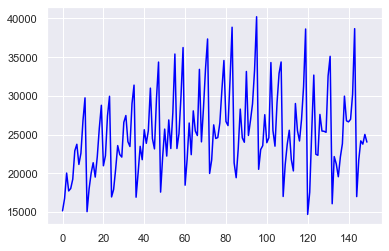

In [30]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

x = np.arange(y.shape[0])

plt.plot(x[:150], train, c='blue')

In [23]:
import statsmodels.tsa.stattools as sts 
sts.adfuller(test)

(-2.9401559318290142,
 0.04087372686145628,
 9,
 16,
 {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625},
 321.18741373652455)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3049.597, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2895.934, Time=0.57 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2917.891, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3047.612, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3039.240, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2890.929, Time=1.54 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2892.498, Time=4.02 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2890.523, Time=0.92 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2981.524, Time=0.25 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2892.534, Time=10.36 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2931.096, Time=2.12 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.52 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2906.713, Time=0.62 sec
 ARIMA(2,1,0)(1,0,1)[12] int

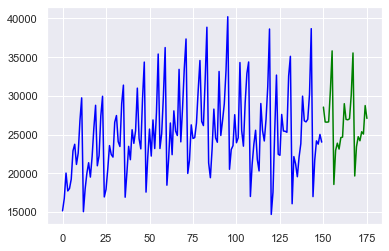

In [19]:


# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12, trace=True)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()

In [28]:
test.shape

(26,)